In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

## 1. Exploratory Data Analysis

### Question 1.1

Load the data from https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data to a variable `df` as a `pandas.DataFrame`. The columns are defined as follows:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: >50K, <=50K.

In [2]:
df = pd.read_csv('adult.data')
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


*Write your answer here*

In [3]:
list_col = df.columns.tolist()
new_list_col = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
               'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
dict_col = dict(zip(list_col, new_list_col))
df.rename(dict_col, axis=1, inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Mendeskripsikan semua data per features (kolom)
list_item = []
for i in df.columns:
    list_item.append([i, df[i].dtype, df[i].isnull().sum(),
                     round(df[i].isnull().sum()/len(df),2), df[i].nunique(), 
                      df[i].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='features dtype null null% nunique unique_sample'.split())
desc_df

,features,dtype,null,null%,nunique,unique_sample
0,age,int64,0,0.0,73,"[50, 38, 53, 28]"
1,workclass,object,0,0.0,9,"[ Self-emp-not-inc, Private, State-gov, Fed..."
2,fnlwgt,int64,0,0.0,21647,"[83311, 215646, 234721, 338409]"
3,education,object,0,0.0,16,"[ Bachelors, HS-grad, 11th, Masters]"
4,education-num,int64,0,0.0,16,"[13, 9, 7, 14]"
5,marital-status,object,0,0.0,7,"[ Married-civ-spouse, Divorced, Married-spou..."
6,occupation,object,0,0.0,15,"[ Exec-managerial, Handlers-cleaners, Prof-s..."
7,relationship,object,0,0.0,6,"[ Husband, Not-in-family, Wife, Own-child]"
8,race,object,0,0.0,5,"[ White, Black, Asian-Pac-Islander, Amer-In..."
9,sex,object,0,0.0,2,"[ Male, Female]"


In [5]:
desc_df[desc_df['dtype']=='int64']

,features,dtype,null,null%,nunique,unique_sample
0,age,int64,0,0.0,73,"[50, 38, 53, 28]"
2,fnlwgt,int64,0,0.0,21647,"[83311, 215646, 234721, 338409]"
4,education-num,int64,0,0.0,16,"[13, 9, 7, 14]"
10,capital-gain,int64,0,0.0,119,"[0, 14084, 5178, 5013]"
11,capital-loss,int64,0,0.0,92,"[0, 2042, 1408, 1902]"
12,hours-per-week,int64,0,0.0,94,"[13, 40, 16, 45]"


In [6]:
desc_df[desc_df['dtype']=='object']

,features,dtype,null,null%,nunique,unique_sample
1,workclass,object,0,0.0,9,"[ Self-emp-not-inc, Private, State-gov, Fed..."
3,education,object,0,0.0,16,"[ Bachelors, HS-grad, 11th, Masters]"
5,marital-status,object,0,0.0,7,"[ Married-civ-spouse, Divorced, Married-spou..."
6,occupation,object,0,0.0,15,"[ Exec-managerial, Handlers-cleaners, Prof-s..."
7,relationship,object,0,0.0,6,"[ Husband, Not-in-family, Wife, Own-child]"
8,race,object,0,0.0,5,"[ White, Black, Asian-Pac-Islander, Amer-In..."
9,sex,object,0,0.0,2,"[ Male, Female]"
13,native-country,object,0,0.0,42,"[ United-States, Cuba, Jamaica, India]"
14,income,object,0,0.0,2,"[ <=50K, >50K]"


In [7]:
feat_int = desc_df[desc_df['dtype']=='int64']['features'].tolist()
print('Integer Features:',feat_int)
feat_obj = desc_df[desc_df['dtype']=='object']['features'].tolist()
print('Object Features:',feat_obj)

Integer Features: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Object Features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [8]:
# Variasi DataFrame
dfa = df.copy(deep=True)
dfa.drop(feat_obj, axis=1, inplace=True)
dfa['income'] = LabelEncoder().fit_transform(df['income'])
display(dfa)

dfb = df.copy(deep=True)
dfb.drop(feat_int, axis=1, inplace=True)
dfb['income'] = df['income']
display(dfb)

dfc = pd.DataFrame()
for i in dfb.columns.tolist():
    dfc[i] = LabelEncoder().fit_transform(dfb[i])
display(dfc)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,50,83311,13,0,0,13,0
1,38,215646,9,0,0,40,0
2,53,234721,7,0,0,40,0
3,28,338409,13,0,0,40,0
4,37,284582,14,0,0,40,0
...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0
32556,40,154374,9,0,0,40,1
32557,58,151910,9,0,0,40,0
32558,22,201490,9,0,0,20,0


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,6,9,2,4,0,4,1,39,0
1,4,11,0,6,1,4,1,39,0
2,4,1,2,6,0,2,1,39,0
3,4,9,2,10,5,2,0,5,0
4,4,12,2,4,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0
32556,4,11,2,7,0,4,1,39,1
32557,4,11,6,1,4,4,0,39,0
32558,4,11,4,1,3,4,1,39,0


In [9]:
# Untuk mengetahui keterangan value sebenarnya
col_encoded = feat_obj
for i in col_encoded:
    print(i)
    display(dfc[i].unique())
    display(dfb[i].unique())
    print('')

workclass


array([6, 4, 7, 1, 2, 0, 5, 8, 3])

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)


education


array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2])

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)


marital-status


array([2, 0, 3, 4, 5, 1, 6])

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)


occupation


array([ 4,  6, 10,  8,  1, 12,  3, 14,  5,  7, 13,  0, 11,  2,  9])

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)


relationship


array([0, 1, 5, 3, 4, 2])

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)


race


array([4, 2, 1, 0, 3])

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)


sex


array([1, 0])

array([' Male', ' Female'], dtype=object)


native-country


array([39,  5, 23, 19,  0, 26, 35, 33, 16,  9,  2, 11, 20, 30, 22, 31,  4,
        1, 37,  7, 25, 36, 14, 32,  6,  8, 10, 13,  3, 24, 41, 29, 28, 34,
       38, 12, 27, 40, 17, 21, 18, 15])

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)


income


array([0, 1])

array([' <=50K', ' >50K'], dtype=object)

### Question 1

Do exploration of the data. What are the insights you can gather

In [10]:
for i in df.columns.tolist():
    print('Feature:',i)
    display(df[i].value_counts())

Feature: age


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

Feature: workclass


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Feature: fnlwgt


123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: fnlwgt, Length: 21647, dtype: int64

Feature: education


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Feature: education-num


9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

Feature: marital-status


 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

Feature: occupation


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Feature: relationship


 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

Feature: race


 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

Feature: sex


 Male      21789
 Female    10771
Name: sex, dtype: int64

Feature: capital-gain


0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64

Feature: capital-loss


0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital-loss, Length: 92, dtype: int64

Feature: hours-per-week


40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

Feature: native-country


 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Feature: income


 <=50K    24719
 >50K      7841
Name: income, dtype: int64

### Melihat distribusi data dari Integer Features

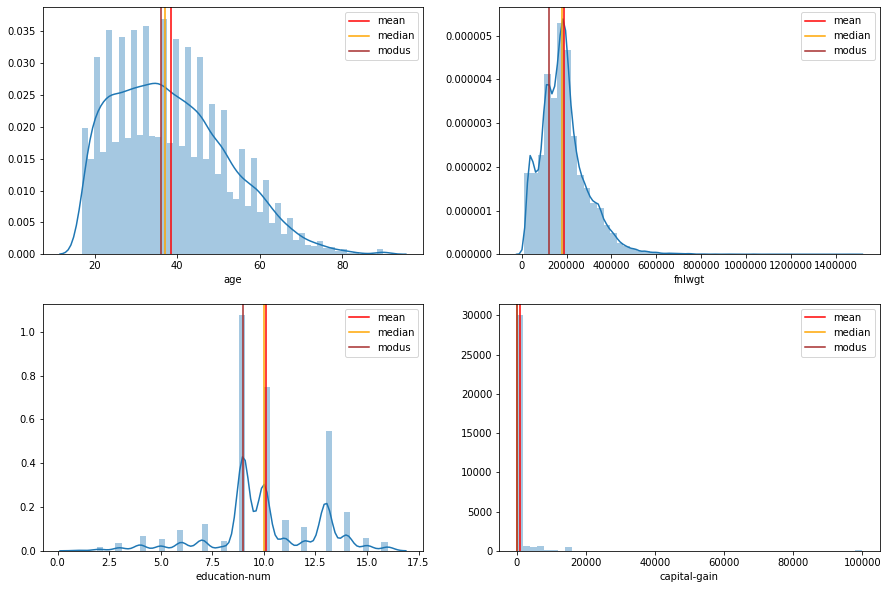

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.distplot(df['age'])
plt.axvline(df['age'].mean(), color='r', label='mean')
plt.axvline(df['age'].median(), color='orange', label='median')
plt.axvline(df['age'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(222)
sns.distplot(df['fnlwgt'])
plt.axvline(df['fnlwgt'].mean(), color='r', label='mean')
plt.axvline(df['fnlwgt'].median(), color='orange', label='median')
plt.axvline(df['fnlwgt'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(223)
sns.distplot(df['education-num'])
plt.axvline(df['education-num'].mean(), color='r', label='mean')
plt.axvline(df['education-num'].median(), color='orange', label='median')
plt.axvline(df['education-num'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(224)
sns.distplot(df['capital-gain'], kde=False)
plt.axvline(df['capital-gain'].mean(), color='r', label='mean')
plt.axvline(df['capital-gain'].median(), color='orange', label='median')
plt.axvline(df['capital-gain'].mode()[0], color='brown', label='modus')
plt.legend()

plt.show()

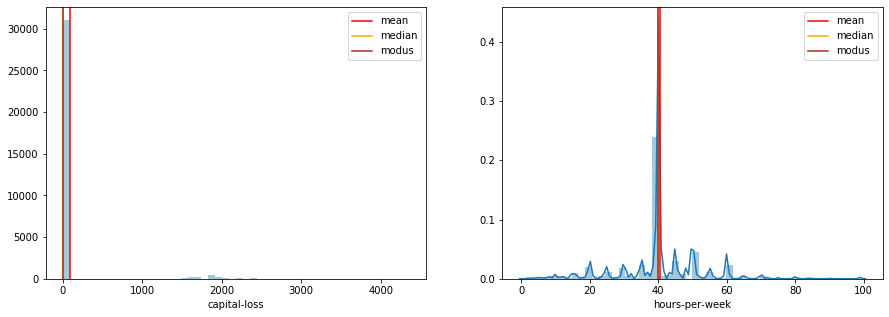

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['capital-loss'], kde=False)
plt.axvline(df['capital-loss'].mean(), color='r', label='mean')
plt.axvline(df['capital-loss'].median(), color='orange', label='median')
plt.axvline(df['capital-loss'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(122)
sns.distplot(df['hours-per-week'])
plt.axvline(df['hours-per-week'].mean(), color='r', label='mean')
plt.axvline(df['hours-per-week'].median(), color='orange', label='median')
plt.axvline(df['hours-per-week'].mode()[0], color='brown', label='modus')
plt.legend()

plt.show()

**Detect and Deal with Outliers using Boxplot & IQR**

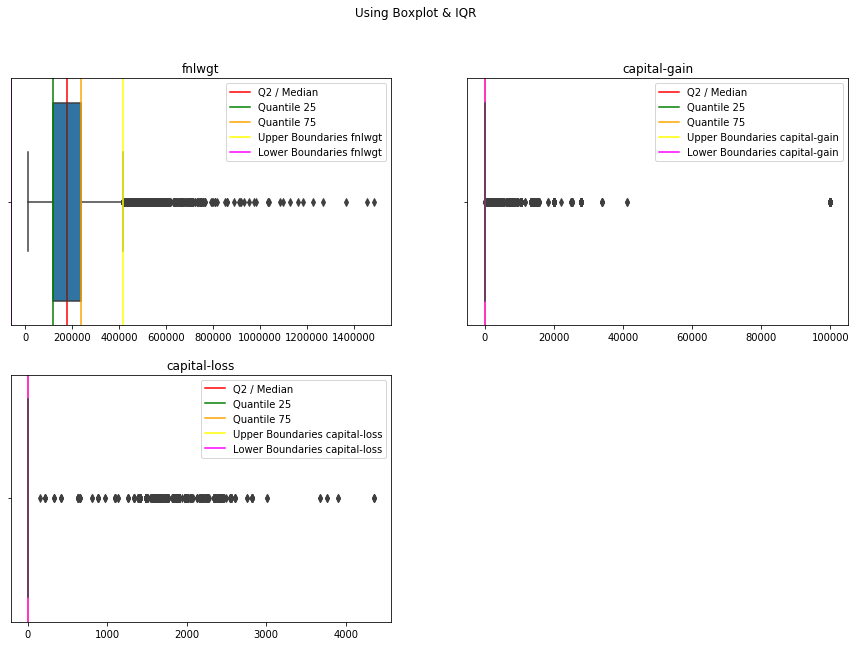

Upper Boundaries fnlwgt: 415889.0
Lower Boundaries fnlwgt: -61003.0 

Upper Boundaries capital-gain: 0.0
Lower Boundaries capital-gain: 0.0 

Upper Boundaries capital-loss: 0.0
Lower Boundaries capital-loss: 0.0


In [13]:
plt.figure(figsize=(15,10))
plt.suptitle('Using Boxplot & IQR')

plt.subplot(2,2,1)
plt.title('fnlwgt')
data_fnlwgt = df['fnlwgt'].values.tolist()
sns.boxplot(x=data_fnlwgt)
iqr_f = np.quantile(data_fnlwgt, 0.75) - np.quantile(data_fnlwgt, 0.25)
upper_boundaries_f = np.quantile(data_fnlwgt, 0.75) + (1.5*iqr_f)
lower_boundaries_f = np.quantile(data_fnlwgt, 0.25) - (1.5*iqr_f)
plt.axvline(np.median(data_fnlwgt), color='red', label='Q2 / Median')
plt.axvline(np.quantile(data_fnlwgt, 0.25), color='green', label='Quantile 25')
plt.axvline(np.quantile(data_fnlwgt, 0.75), color='orange', label='Quantile 75')
plt.axvline(upper_boundaries_f, color='yellow', label='Upper Boundaries fnlwgt')
plt.axvline(lower_boundaries_f, color='magenta', label='Lower Boundaries fnlwgt')
plt.legend()

plt.subplot(2,2,2)
plt.title('capital-gain')
data_cg = df['capital-gain'].values.tolist()
sns.boxplot(x=data_cg)
iqr_cg = np.quantile(data_cg, 0.75) - np.quantile(data_cg, 0.25)
upper_boundaries_cg = np.quantile(data_cg, 0.75) + (1.5*iqr_cg)
lower_boundaries_cg = np.quantile(data_cg, 0.25) - (1.5*iqr_cg)
plt.axvline(np.median(data_cg), color='red', label='Q2 / Median')
plt.axvline(np.quantile(data_cg, 0.25), color='green', label='Quantile 25')
plt.axvline(np.quantile(data_cg, 0.75), color='orange', label='Quantile 75')
plt.axvline(upper_boundaries_cg, color='yellow', label='Upper Boundaries capital-gain')
plt.axvline(lower_boundaries_cg, color='magenta', label='Lower Boundaries capital-gain')
plt.legend()

plt.subplot(2,2,3)
plt.title('capital-loss')
data_cl = df['capital-loss'].values.tolist()
sns.boxplot(x=data_cl)
iqr_cl = np.quantile(data_cl, 0.75) - np.quantile(data_cl, 0.25)
upper_boundaries_cl = np.quantile(data_cl, 0.75) + (1.5*iqr_cl)
lower_boundaries_cl = np.quantile(data_cl, 0.25) - (1.5*iqr_cl)
plt.axvline(np.median(data_cl), color='red', label='Q2 / Median')
plt.axvline(np.quantile(data_cl, 0.25), color='green', label='Quantile 25')
plt.axvline(np.quantile(data_cl, 0.75), color='orange', label='Quantile 75')
plt.axvline(upper_boundaries_cl, color='yellow', label='Upper Boundaries capital-loss')
plt.axvline(lower_boundaries_cl, color='magenta', label='Lower Boundaries capital-loss')
plt.legend()

plt.show()

print('Upper Boundaries fnlwgt:', upper_boundaries_f)
print('Lower Boundaries fnlwgt:', lower_boundaries_f, '\n')
print('Upper Boundaries capital-gain:', upper_boundaries_cg)
print('Lower Boundaries capital-gain:', lower_boundaries_cg, '\n')
print('Upper Boundaries capital-loss:', upper_boundaries_cl)
print('Lower Boundaries capital-loss:', lower_boundaries_cl)

In [14]:
out_f = []
idx_f = []
for x, y in enumerate (data_fnlwgt):
    if y > upper_boundaries_f or y < lower_boundaries_f:
        idx_f.append(x)
        out_f.append(y)
print(f'Total of Outliers fnlwgt: {len(idx_f)}')
print('Prosentase Data Outliers fnlwgt:', round(len(out_f)/len(df)*100 ,2), '%')
print('Index of Outliers fnlwgt:', idx_f, '\n')
print('Values of Outliers fnlwgt:', out_f, '\n')

Total of Outliers fnlwgt: 992
Prosentase Data Outliers fnlwgt: 3.05 %
Index of Outliers fnlwgt: [36, 39, 79, 109, 156, 172, 176, 181, 191, 214, 229, 274, 284, 311, 317, 368, 399, 404, 413, 416, 507, 566, 620, 650, 682, 698, 760, 826, 835, 913, 940, 962, 1011, 1033, 1150, 1156, 1181, 1192, 1235, 1288, 1290, 1300, 1313, 1349, 1368, 1376, 1435, 1453, 1507, 1508, 1543, 1596, 1605, 1627, 1653, 1663, 1678, 1745, 1796, 1821, 1846, 1882, 1894, 1949, 1964, 1970, 1978, 1984, 2017, 2034, 2064, 2122, 2181, 2192, 2265, 2321, 2341, 2346, 2356, 2368, 2398, 2471, 2513, 2532, 2574, 2672, 2674, 2759, 2766, 2769, 2771, 2819, 2821, 2823, 2849, 2875, 2899, 2935, 2941, 2945, 2976, 3025, 3149, 3192, 3193, 3236, 3257, 3280, 3285, 3302, 3375, 3408, 3426, 3457, 3476, 3501, 3568, 3570, 3611, 3705, 3718, 3737, 3743, 3746, 3797, 3804, 3807, 3827, 3869, 3900, 3902, 3905, 3943, 3963, 3982, 4059, 4088, 4097, 4106, 4123, 4164, 4194, 4240, 4244, 4277, 4279, 4299, 4318, 4390, 4422, 4453, 4482, 4548, 4557, 4572, 4696, 47

In [15]:
out_cg = []
idx_cg = []
for x, y in enumerate (data_cg):
    if y > upper_boundaries_cg or y < lower_boundaries_cg:
        idx_cg.append(x)
        out_cg.append(y)
print(f'Total of Outliers capital-gain: {len(idx_cg)}')
print('Prosentase Data Outliers capital-gain:', round(len(out_cg)/len(df)*100 ,2), '%')
print('Index of Outliers capital-gain:', idx_cg, '\n')
print('Values of Outliers capital-gain:', out_cg, '\n')

Total of Outliers capital-gain: 2711
Prosentase Data Outliers capital-gain: 8.33 %
Index of Outliers capital-gain: [7, 8, 58, 59, 83, 100, 104, 105, 112, 131, 196, 197, 205, 207, 226, 229, 262, 270, 271, 275, 278, 280, 284, 296, 299, 302, 310, 328, 340, 341, 392, 412, 420, 431, 435, 483, 488, 519, 520, 533, 565, 592, 597, 609, 612, 618, 631, 636, 642, 650, 655, 664, 665, 674, 703, 712, 721, 723, 728, 734, 737, 741, 745, 749, 788, 792, 804, 806, 830, 843, 871, 888, 892, 914, 933, 975, 977, 988, 997, 998, 1007, 1011, 1035, 1042, 1051, 1060, 1087, 1107, 1120, 1144, 1148, 1159, 1165, 1198, 1209, 1212, 1215, 1217, 1245, 1249, 1276, 1283, 1285, 1315, 1319, 1334, 1337, 1348, 1350, 1367, 1377, 1395, 1397, 1425, 1426, 1432, 1445, 1451, 1455, 1459, 1468, 1481, 1484, 1492, 1500, 1502, 1510, 1516, 1527, 1553, 1561, 1573, 1582, 1591, 1592, 1615, 1626, 1629, 1636, 1638, 1641, 1642, 1654, 1669, 1671, 1681, 1690, 1692, 1729, 1734, 1763, 1764, 1767, 1768, 1770, 1771, 1778, 1779, 1783, 1784, 1786, 1794,

In [16]:
out_cl = []
idx_cl = []
for x, y in enumerate (data_cl):
    if y > upper_boundaries_cl or y < lower_boundaries_cl:
        idx_cl.append(x)
        out_cl.append(y)
print(f'Total of Outliers capital-loss: {len(idx_cl)}')
print('Prosentase Data Outliers capital-loss:', round(len(out_cl)/len(df)*100 ,2), '%')
print('Index of Outliers capital-loss:', idx_cl, '\n')
print('Values of Outliers capital-loss:', out_cl, '\n')

Total of Outliers capital-loss: 1519
Prosentase Data Outliers capital-loss: 4.67 %
Index of Outliers capital-loss: [22, 31, 51, 92, 95, 111, 125, 130, 142, 147, 156, 169, 171, 199, 202, 221, 243, 247, 320, 326, 362, 380, 386, 403, 404, 407, 425, 433, 467, 509, 572, 587, 596, 667, 668, 696, 700, 720, 731, 780, 785, 798, 800, 823, 824, 872, 936, 946, 971, 989, 1000, 1030, 1034, 1048, 1057, 1065, 1070, 1072, 1075, 1097, 1101, 1114, 1163, 1229, 1253, 1265, 1275, 1279, 1294, 1354, 1386, 1390, 1391, 1428, 1439, 1443, 1465, 1485, 1496, 1517, 1523, 1540, 1547, 1570, 1620, 1627, 1659, 1684, 1686, 1694, 1708, 1736, 1776, 1815, 1840, 1899, 1914, 1925, 1926, 1944, 2009, 2013, 2016, 2029, 2047, 2062, 2094, 2105, 2111, 2115, 2152, 2239, 2258, 2271, 2274, 2289, 2303, 2324, 2329, 2333, 2357, 2378, 2381, 2391, 2394, 2395, 2413, 2419, 2420, 2425, 2467, 2472, 2500, 2526, 2606, 2629, 2734, 2742, 2755, 2774, 2783, 2795, 2812, 2832, 2840, 2842, 2858, 2900, 2903, 2906, 2924, 2934, 2950, 3020, 3023, 3026, 303

**Note: Data Outliers tidak dihapus karena jika dihapus prosentase data yang hilang lebih dari 3%**

### Visualization

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [18]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

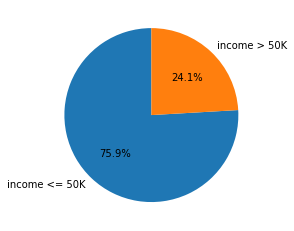

Jumlah income <= 50K: 24719
Jumlah income > 50K: 7841


In [19]:
sizes = [len(df[df['income']==' <=50K']), len(df[df['income']==' >50K'])]
labels = ['income <= 50K', 'income > 50K']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()
print('Jumlah income <= 50K:',sizes[0])
print('Jumlah income > 50K:',sizes[1])

# Chart berikut menampilkan nilai rasio antara income <= 50K dan income > 50K yang terdapat di dalam data

In [20]:
# Group by income 
df_by_inc = df.groupby('income')
for i in feat_obj:
    display(df_by_inc[i].value_counts())
    display(df_by_inc[i].value_counts(normalize=True))

income  workclass        
 <=50K   Private             17733
         Self-emp-not-inc     1817
         ?                    1645
         Local-gov            1476
         State-gov             944
         Federal-gov           589
         Self-emp-inc          494
         Without-pay            14
         Never-worked            7
 >50K    Private              4963
         Self-emp-not-inc      724
         Self-emp-inc          622
         Local-gov             617
         Federal-gov           371
         State-gov             353
         ?                     191
Name: workclass, dtype: int64

income  workclass        
 <=50K   Private             0.717383
         Self-emp-not-inc    0.073506
         ?                   0.066548
         Local-gov           0.059711
         State-gov           0.038189
         Federal-gov         0.023828
         Self-emp-inc        0.019985
         Without-pay         0.000566
         Never-worked        0.000283
 >50K    Private             0.632955
         Self-emp-not-inc    0.092335
         Self-emp-inc        0.079327
         Local-gov           0.078689
         Federal-gov         0.047315
         State-gov           0.045020
         ?                   0.024359
Name: workclass, dtype: float64

income  education    
 <=50K   HS-grad         8826
         Some-college    5904
         Bachelors       3133
         11th            1115
         Assoc-voc       1021
         10th             871
         Assoc-acdm       802
         Masters          764
         7th-8th          606
         9th              487
         12th             400
         5th-6th          317
         1st-4th          162
         Prof-school      153
         Doctorate        107
         Preschool         51
 >50K    Bachelors       2221
         HS-grad         1675
         Some-college    1387
         Masters          959
         Prof-school      423
         Assoc-voc        361
         Doctorate        306
         Assoc-acdm       265
         10th              62
         11th              60
         7th-8th           40
         12th              33
         9th               27
         5th-6th           16
         1st-4th            6
Name: education, dtype: int64

income  education    
 <=50K   HS-grad         0.357053
         Some-college    0.238845
         Bachelors       0.126745
         11th            0.045107
         Assoc-voc       0.041304
         10th            0.035236
         Assoc-acdm      0.032445
         Masters         0.030907
         7th-8th         0.024516
         9th             0.019701
         12th            0.016182
         5th-6th         0.012824
         1st-4th         0.006554
         Prof-school     0.006190
         Doctorate       0.004329
         Preschool       0.002063
 >50K    Bachelors       0.283255
         HS-grad         0.213621
         Some-college    0.176891
         Masters         0.122306
         Prof-school     0.053947
         Assoc-voc       0.046040
         Doctorate       0.039026
         Assoc-acdm      0.033797
         10th            0.007907
         11th            0.007652
         7th-8th         0.005101
         12th            0.004209
         9th             0

income  marital-status        
 <=50K   Never-married            10191
         Married-civ-spouse        8284
         Divorced                  3980
         Separated                  959
         Widowed                    908
         Married-spouse-absent      384
         Married-AF-spouse           13
 >50K    Married-civ-spouse        6692
         Never-married              491
         Divorced                   463
         Widowed                     85
         Separated                   66
         Married-spouse-absent       34
         Married-AF-spouse           10
Name: marital-status, dtype: int64

income  marital-status        
 <=50K   Never-married            0.412274
         Married-civ-spouse       0.335127
         Divorced                 0.161010
         Separated                0.038796
         Widowed                  0.036733
         Married-spouse-absent    0.015535
         Married-AF-spouse        0.000526
 >50K    Married-civ-spouse       0.853463
         Never-married            0.062620
         Divorced                 0.059049
         Widowed                  0.010840
         Separated                0.008417
         Married-spouse-absent    0.004336
         Married-AF-spouse        0.001275
Name: marital-status, dtype: float64

income  occupation        
 <=50K   Adm-clerical         3262
         Craft-repair         3170
         Other-service        3158
         Sales                2667
         Prof-specialty       2281
         Exec-managerial      2098
         Machine-op-inspct    1752
         ?                    1652
         Handlers-cleaners    1284
         Transport-moving     1277
         Farming-fishing       879
         Tech-support          645
         Protective-serv       438
         Priv-house-serv       148
         Armed-Forces            8
 >50K    Exec-managerial      1968
         Prof-specialty       1859
         Sales                 983
         Craft-repair          929
         Adm-clerical          507
         Transport-moving      320
         Tech-support          283
         Machine-op-inspct     250
         Protective-serv       211
         ?                     191
         Other-service         137
         Farming-fishing       115
         Handlers-cleaners  

income  occupation        
 <=50K   Adm-clerical         0.131963
         Craft-repair         0.128241
         Other-service        0.127756
         Sales                0.107893
         Prof-specialty       0.092277
         Exec-managerial      0.084874
         Machine-op-inspct    0.070877
         ?                    0.066831
         Handlers-cleaners    0.051944
         Transport-moving     0.051661
         Farming-fishing      0.035560
         Tech-support         0.026093
         Protective-serv      0.017719
         Priv-house-serv      0.005987
         Armed-Forces         0.000324
 >50K    Exec-managerial      0.250988
         Prof-specialty       0.237087
         Sales                0.125367
         Craft-repair         0.118480
         Adm-clerical         0.064660
         Transport-moving     0.040811
         Tech-support         0.036092
         Machine-op-inspct    0.031884
         Protective-serv      0.026910
         ?                    0.02435

income  relationship   
 <=50K   Not-in-family     7448
         Husband           7275
         Own-child         5001
         Unmarried         3228
         Other-relative     944
         Wife               823
 >50K    Husband           5918
         Not-in-family      856
         Wife               745
         Unmarried          218
         Own-child           67
         Other-relative      37
Name: relationship, dtype: int64

income  relationship   
 <=50K   Not-in-family     0.301307
         Husband           0.294308
         Own-child         0.202314
         Unmarried         0.130588
         Other-relative    0.038189
         Wife              0.033294
 >50K    Husband           0.754751
         Not-in-family     0.109170
         Wife              0.095013
         Unmarried         0.027803
         Own-child         0.008545
         Other-relative    0.004719
Name: relationship, dtype: float64

income  race               
 <=50K   White                 20698
         Black                  2737
         Asian-Pac-Islander      763
         Amer-Indian-Eskimo      275
         Other                   246
 >50K    White                  7117
         Black                   387
         Asian-Pac-Islander      276
         Amer-Indian-Eskimo       36
         Other                    25
Name: race, dtype: int64

income  race               
 <=50K   White                 0.837332
         Black                 0.110725
         Asian-Pac-Islander    0.030867
         Amer-Indian-Eskimo    0.011125
         Other                 0.009952
 >50K    White                 0.907665
         Black                 0.049356
         Asian-Pac-Islander    0.035200
         Amer-Indian-Eskimo    0.004591
         Other                 0.003188
Name: race, dtype: float64

income  sex    
 <=50K   Male      15127
         Female     9592
 >50K    Male       6662
         Female     1179
Name: sex, dtype: int64

income  sex    
 <=50K   Male      0.611958
         Female    0.388042
 >50K    Male      0.849637
         Female    0.150363
Name: sex, dtype: float64

income  native-country  
 <=50K   United-States      21998
         Mexico               610
         ?                    437
         Philippines          137
         Puerto-Rico          102
                            ...  
 >50K    Laos                   2
         Nicaragua              2
         Peru                   2
         Trinadad&Tobago        2
         Honduras               1
Name: native-country, Length: 82, dtype: int64

income  native-country  
 <=50K   United-States      0.889923
         Mexico             0.024677
         ?                  0.017679
         Philippines        0.005542
         Puerto-Rico        0.004126
                              ...   
 >50K    Laos               0.000255
         Nicaragua          0.000255
         Peru               0.000255
         Trinadad&Tobago    0.000255
         Honduras           0.000128
Name: native-country, Length: 82, dtype: float64

income  income
 <=50K   <=50K    24719
 >50K    >50K      7841
Name: income, dtype: int64

income  income
 <=50K   <=50K    1.0
 >50K    >50K     1.0
Name: income, dtype: float64

### Relationship between Income and Object Features

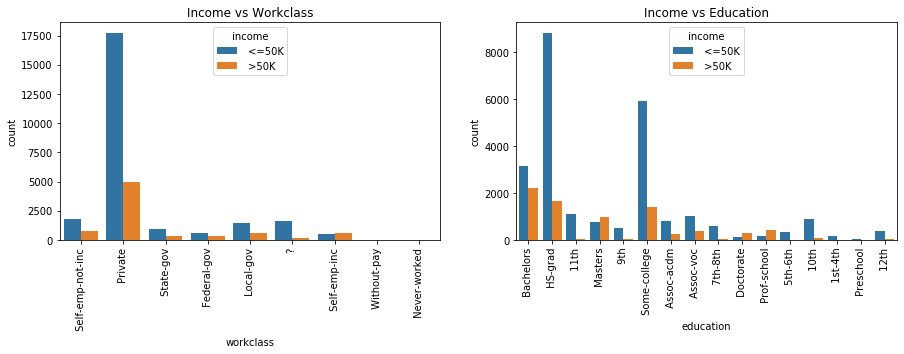

In [21]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title('Income vs Workclass')
sns.countplot(df['workclass'], hue=df['income'])
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Income vs Education')
sns.countplot(df['education'], hue=df['income'])
plt.xticks(rotation=90)

plt.show()

# Income terbanyak adalah pada Workclass Private
# Yang sama sekali tidak ada income adalah pada Workclass Without-pay dan Never-worked

# Education yang menghasilkan income <= 50K terbanyak adalah HS-grad
# Namun Education yang menghasilkan income > 50K terbanyak adalah Bachelors

In [22]:
df_by_inc['workclass'].value_counts(normalize=True)[' <=50K'].index

Index([' Private', ' Self-emp-not-inc', ' ?', ' Local-gov', ' State-gov',
       ' Federal-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype='object', name='workclass')

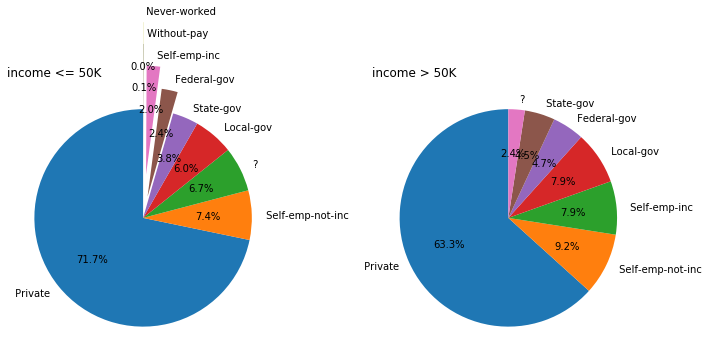

In [23]:
# Menggambarkan nilai rasio workclass dengan grafik dalam bentuk pie-chart
labels_f = df_by_inc['workclass'].value_counts(normalize=True)[' <=50K'].index
labels_t = df_by_inc['workclass'].value_counts(normalize=True)[' >50K'].index
plt.figure(figsize=(12,5))
explode_f = [0, 0, 0, 0, 0, 0.2, 0.4, 0.6, 0.8]
plt.subplot(121)
plt.title('income <= 50K', loc='left')
plt.pie(df_by_inc['workclass'].value_counts(normalize=True)[' <=50K'], labels=labels_f, explode=explode_f, autopct='%1.1f%%', startangle=90)

plt.subplot(122)
plt.title('income > 50K', loc='left')
plt.pie(df_by_inc['workclass'].value_counts(normalize=True)[' >50K'], labels=labels_t, autopct='%1.1f%%', startangle=90)

plt.show()

In [24]:
# df_by_inc['education'].value_counts().head(10)[' <=50K'].index.tolist()
# df_by_inc['education'].value_counts()[' <=50K'].index.tolist()[:10]
df_by_inc['education'].value_counts()[' >50K'].index.tolist()[:10]

[' Bachelors',
 ' HS-grad',
 ' Some-college',
 ' Masters',
 ' Prof-school',
 ' Assoc-voc',
 ' Doctorate',
 ' Assoc-acdm',
 ' 10th',
 ' 11th']

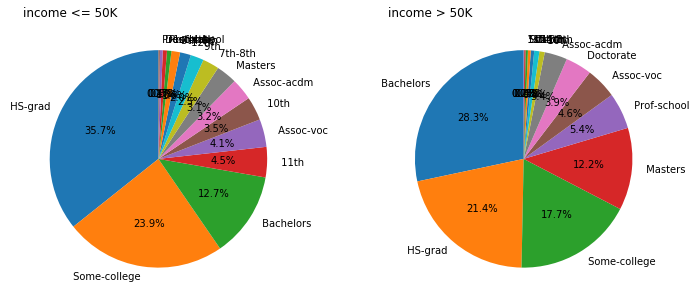

In [25]:
# Menggambarkan nilai rasio education dengan grafik dalam bentuk pie-chart

labels_f = df_by_inc['education'].value_counts()[' <=50K'].index.tolist()
labels_t = df_by_inc['education'].value_counts()[' >50K'].index.tolist()
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('income <= 50K', loc='left')
plt.pie(df_by_inc['education'].value_counts(normalize=True)[' <=50K'], labels=labels_f, autopct='%1.1f%%', startangle=90)

plt.subplot(122)
plt.title('income > 50K', loc='left')
plt.pie(df_by_inc['education'].value_counts(normalize=True)[' >50K'], labels=labels_t, autopct='%1.1f%%', startangle=90)

plt.show()

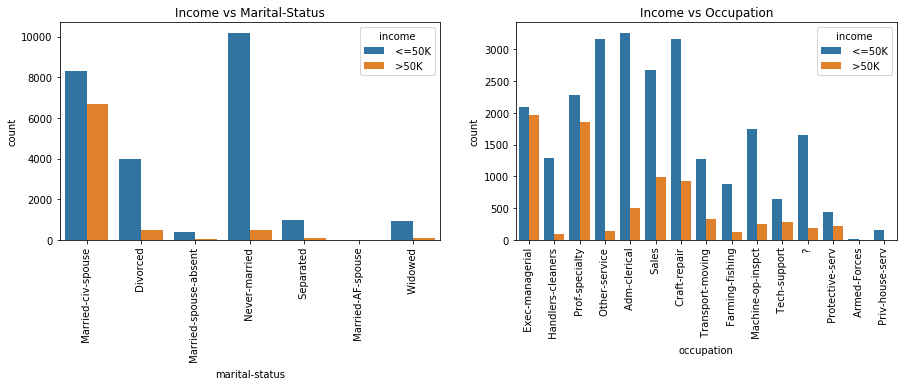

In [26]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title('Income vs Marital-Status')
sns.countplot(df['marital-status'], hue=df['income'])
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Income vs Occupation')
sns.countplot(df['occupation'], hue=df['income'])
plt.xticks(rotation=90)

plt.show()

# Marital-Status yang menghasilkan income <= 50K terbanyak adalah Never_married
# Namun Marital-Status yang menghasilkan income > 50K terbanyak adalah Married-civ-spouse

# 3 Occupation yang menghasilkan income <= 50K terbanyak adalah Adm-clerical, Other-service, dan Craft-repair
# Occupation yang menghasilkan income > 50K terbanyak adalah Exec-managerial

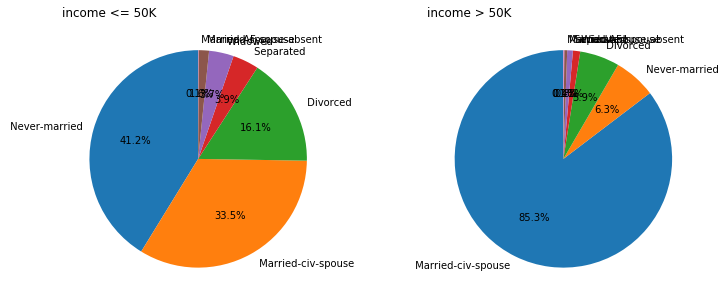

In [27]:
# Menggambarkan nilai rasio marital-status dengan grafik dalam bentuk pie-chart

labels_f = df_by_inc['marital-status'].value_counts()[' <=50K'].index.tolist()
labels_t = df_by_inc['marital-status'].value_counts()[' >50K'].index.tolist()
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('income <= 50K', loc='left')
plt.pie(df_by_inc['marital-status'].value_counts(normalize=True)[' <=50K'], labels=labels_f, autopct='%1.1f%%', startangle=90)

plt.subplot(122)
plt.title('income > 50K', loc='left')
plt.pie(df_by_inc['marital-status'].value_counts(normalize=True)[' >50K'], labels=labels_t, autopct='%1.1f%%', startangle=90)

plt.show()

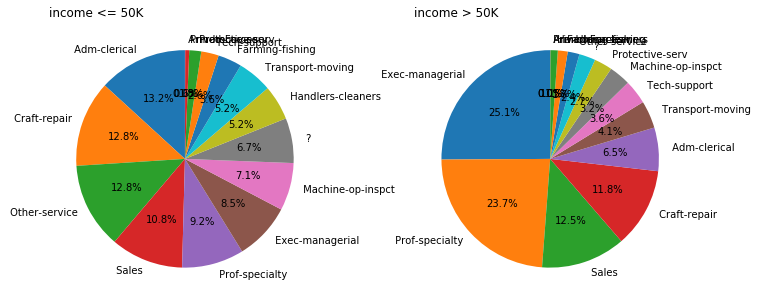

In [28]:
# Menggambarkan nilai rasio occupation dengan grafik dalam bentuk pie-chart

labels_f = df_by_inc['occupation'].value_counts()[' <=50K'].index.tolist()
labels_t = df_by_inc['occupation'].value_counts()[' >50K'].index.tolist()
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('income <= 50K', loc='left')
plt.pie(df_by_inc['occupation'].value_counts()[' <=50K'], labels=labels_f, autopct='%1.1f%%', startangle=90)

plt.subplot(122)
plt.title('income > 50K', loc='left')
plt.pie(df_by_inc['occupation'].value_counts()[' >50K'], labels=labels_t, autopct='%1.1f%%', startangle=90)

plt.show()

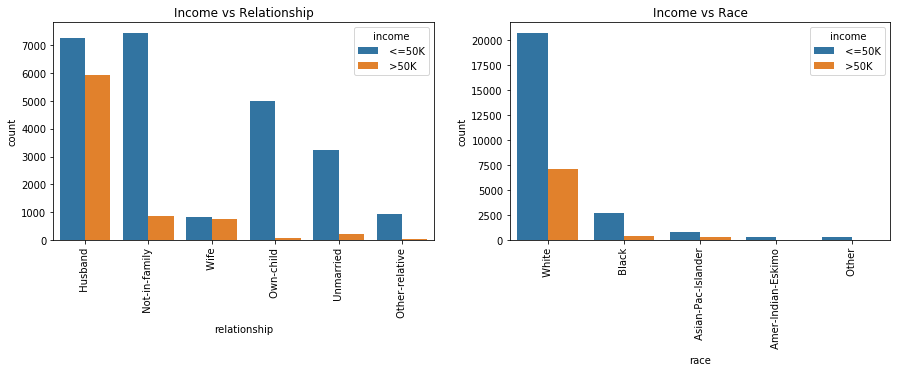

In [29]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title('Income vs Relationship')
sns.countplot(df['relationship'], hue=df['income'])
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Income vs Race')
sns.countplot(df['race'], hue=df['income'])
plt.xticks(rotation=90)

plt.show()

# Relationship yang menghasilkan income <= 50K terbanyak adalah Not-in-family
# Relationship yang menghasilkan income > 50K terbanyak adalah Husband

# Race yang menghasilkan income <= 50K terbanyak adalah White
# Race yang menghasilkan income > 50K terbanyak adalah juga White

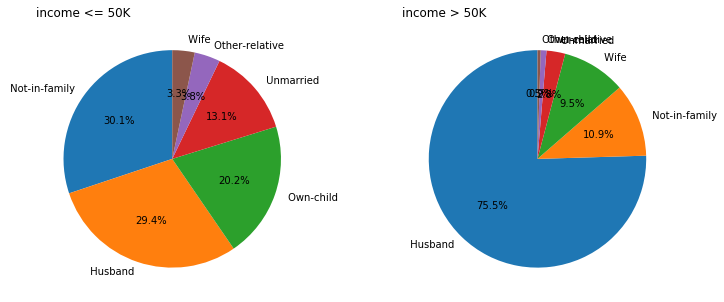

In [30]:
# Menggambarkan nilai rasio relationship dengan grafik dalam bentuk pie-chart

labels_f = df_by_inc['relationship'].value_counts()[' <=50K'].index.tolist()
labels_t = df_by_inc['relationship'].value_counts()[' >50K'].index.tolist()
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('income <= 50K', loc='left')
plt.pie(df_by_inc['relationship'].value_counts()[' <=50K'], labels=labels_f, autopct='%1.1f%%', startangle=90)

plt.subplot(122)
plt.title('income > 50K', loc='left')
plt.pie(df_by_inc['relationship'].value_counts()[' >50K'], labels=labels_t, autopct='%1.1f%%', startangle=90)

plt.show()

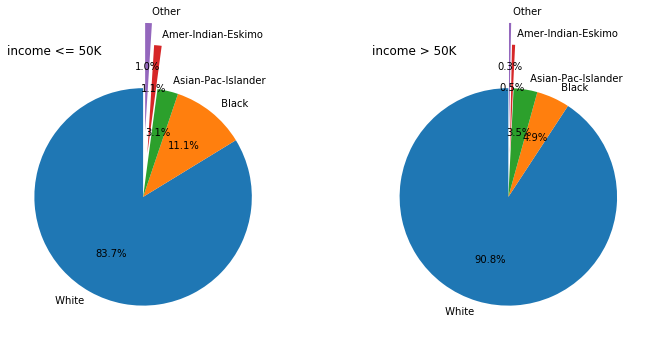

In [31]:
# Menggambarkan nilai rasio race dengan grafik dalam bentuk pie-chart

labels_f = df_by_inc['race'].value_counts()[' <=50K'].index.tolist()
labels_t = df_by_inc['race'].value_counts()[' >50K'].index.tolist()
plt.figure(figsize=(12,5))
explode_f = [0, 0, 0, 0.4, 0.6]
explode_t = [0, 0, 0, 0.4, 0.6]

plt.subplot(121)
plt.title('income <= 50K', loc='left')
plt.pie(df_by_inc['race'].value_counts()[' <=50K'], labels=labels_f, explode=explode_f, autopct='%1.1f%%', startangle=90)

plt.subplot(122)
plt.title('income > 50K', loc='left')
plt.pie(df_by_inc['race'].value_counts()[' >50K'], labels=labels_t, explode=explode_t, autopct='%1.1f%%', startangle=90)

plt.show()

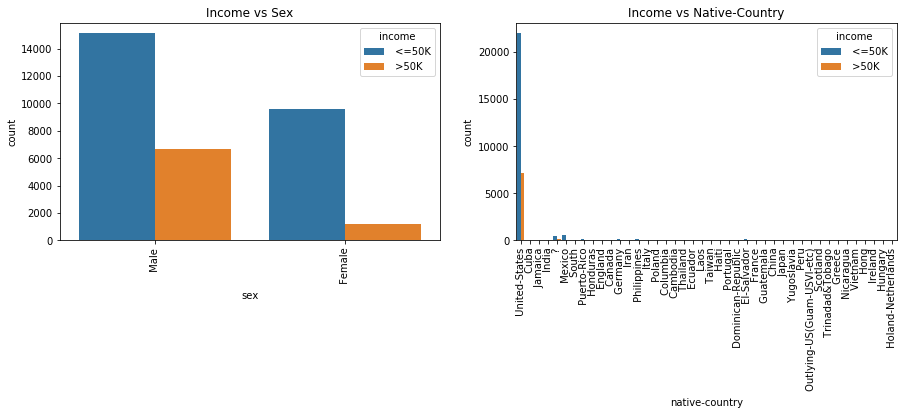

In [32]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title('Income vs Sex')
sns.countplot(df['sex'], hue=df['income'])
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Income vs Native-Country')
sns.countplot(df['native-country'], hue=df['income'])
plt.xticks(rotation=90)

plt.show()

# Sex Gender yang menghasilkan income <= 50K dan income > 50K terbanyak adalah Male

# Native-Country yang menghasilkan income <= 50K dan income > 50K terbanyak adalah United-States

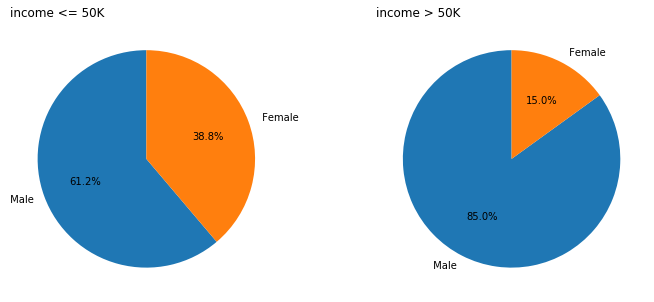

In [33]:
# Menggambarkan nilai rasio sex dengan grafik dalam bentuk pie-chart

labels_f = df_by_inc['sex'].value_counts()[' <=50K'].index.tolist()
labels_t = df_by_inc['sex'].value_counts()[' >50K'].index.tolist()
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('income <= 50K', loc='left')
plt.pie(df_by_inc['sex'].value_counts()[' <=50K'], labels=labels_f, autopct='%1.1f%%', startangle=90)

plt.subplot(122)
plt.title('income > 50K', loc='left')
plt.pie(df_by_inc['sex'].value_counts()[' >50K'], labels=labels_t, autopct='%1.1f%%', startangle=90)

plt.show()

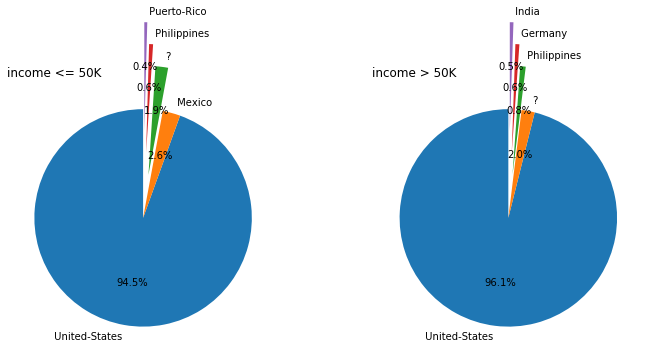

In [34]:
# Menggambarkan nilai 5 rasio tertinggi dari native-country dengan grafik dalam bentuk pie-chart

labels_f = df_by_inc['native-country'].value_counts()[' <=50K'].index.tolist()[:5]
labels_t = df_by_inc['native-country'].value_counts()[' >50K'].index.tolist()[:5]
plt.figure(figsize=(12,5))
explode_f = [0, 0, 0.4, 0.6, 0.8]
explode_t = [0, 0, 0.4, 0.6, 0.8]

plt.subplot(121)
plt.title('income <= 50K', loc='left')
plt.pie(df_by_inc['native-country'].value_counts()[' <=50K'][:5], labels=labels_f, explode=explode_f, autopct='%1.1f%%', startangle=90)

plt.subplot(122)
plt.title('income > 50K', loc='left')
plt.pie(df_by_inc['native-country'].value_counts()[' >50K'][:5], labels=labels_t, explode=explode_t, autopct='%1.1f%%', startangle=90)

plt.show()

In [35]:
feat_int

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

### Relationship between Income and Integer Features

In [36]:
dfi_more = df[df['income']==' >50K']
display(dfi_more.head())
dfi_less = df[df['income']==' <=50K']
display(dfi_less.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
10,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


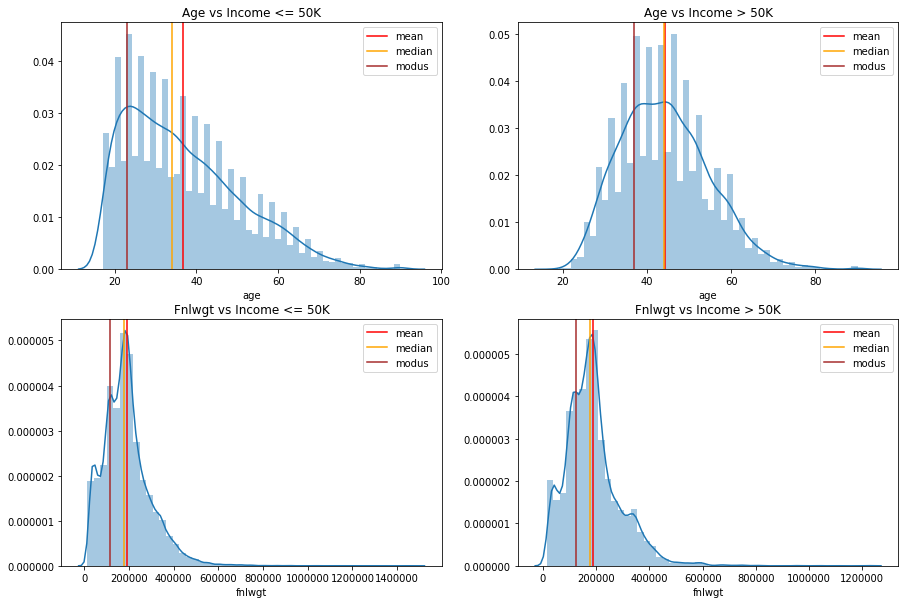

In [37]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('Age vs Income <= 50K')
sns.distplot(dfi_less['age'])
plt.axvline(dfi_less['age'].mean(), color='r', label='mean')
plt.axvline(dfi_less['age'].median(), color='orange', label='median')
plt.axvline(dfi_less['age'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(222)
plt.title('Age vs Income > 50K')
sns.distplot(dfi_more['age'])
plt.axvline(dfi_more['age'].mean(), color='r', label='mean')
plt.axvline(dfi_more['age'].median(), color='orange', label='median')
plt.axvline(dfi_more['age'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(223)
plt.title('Fnlwgt vs Income <= 50K')
sns.distplot(dfi_less['fnlwgt'])
plt.axvline(dfi_less['fnlwgt'].mean(), color='r', label='mean')
plt.axvline(dfi_less['fnlwgt'].median(), color='orange', label='median')
plt.axvline(dfi_less['fnlwgt'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(224)
plt.title('Fnlwgt vs Income > 50K')
sns.distplot(dfi_more['fnlwgt'])
plt.axvline(dfi_more['fnlwgt'].mean(), color='r', label='mean')
plt.axvline(dfi_more['fnlwgt'].median(), color='orange', label='median')
plt.axvline(dfi_more['fnlwgt'].mode()[0], color='brown', label='modus')
plt.legend()

plt.show()

# Grafik ini menunjukkan distribusi data, nilai mean, median dan modus.

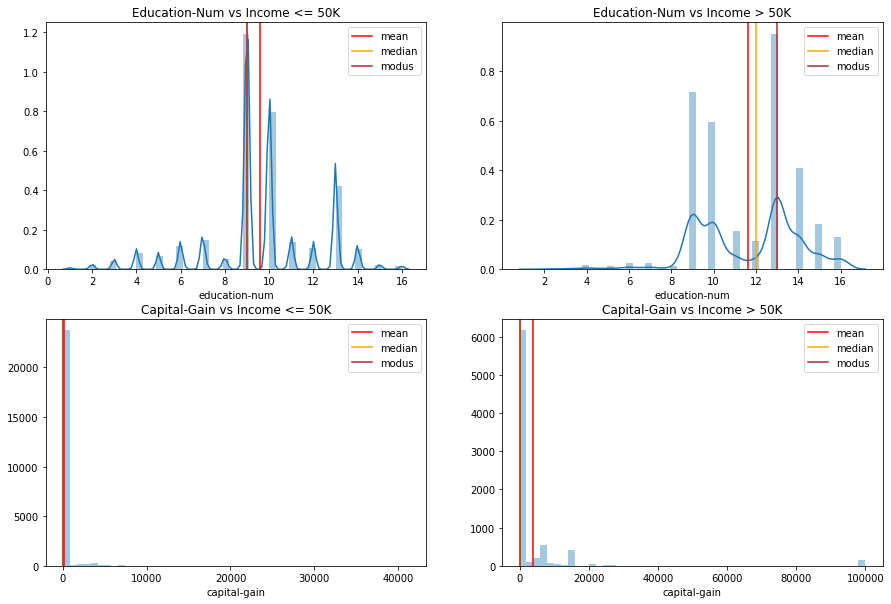

In [38]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('Education-Num vs Income <= 50K')
sns.distplot(dfi_less['education-num'])
plt.axvline(dfi_less['education-num'].mean(), color='r', label='mean')
plt.axvline(dfi_less['education-num'].median(), color='orange', label='median')
plt.axvline(dfi_less['education-num'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(222)
plt.title('Education-Num vs Income > 50K')
sns.distplot(dfi_more['education-num'])
plt.axvline(dfi_more['education-num'].mean(), color='r', label='mean')
plt.axvline(dfi_more['education-num'].median(), color='orange', label='median')
plt.axvline(dfi_more['education-num'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(223)
plt.title('Capital-Gain vs Income <= 50K')
sns.distplot(dfi_less['capital-gain'], kde=False)
plt.axvline(dfi_less['capital-gain'].mean(), color='r', label='mean')
plt.axvline(dfi_less['capital-gain'].median(), color='orange', label='median')
plt.axvline(dfi_less['capital-gain'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(224)
plt.title('Capital-Gain vs Income > 50K')
sns.distplot(dfi_more['capital-gain'], kde=False)
plt.axvline(dfi_more['capital-gain'].mean(), color='r', label='mean')
plt.axvline(dfi_more['capital-gain'].median(), color='orange', label='median')
plt.axvline(dfi_more['capital-gain'].mode()[0], color='brown', label='modus')
plt.legend()

plt.show()

# Grafik ini menunjukkan distribusi data, nilai mean, median dan modus.

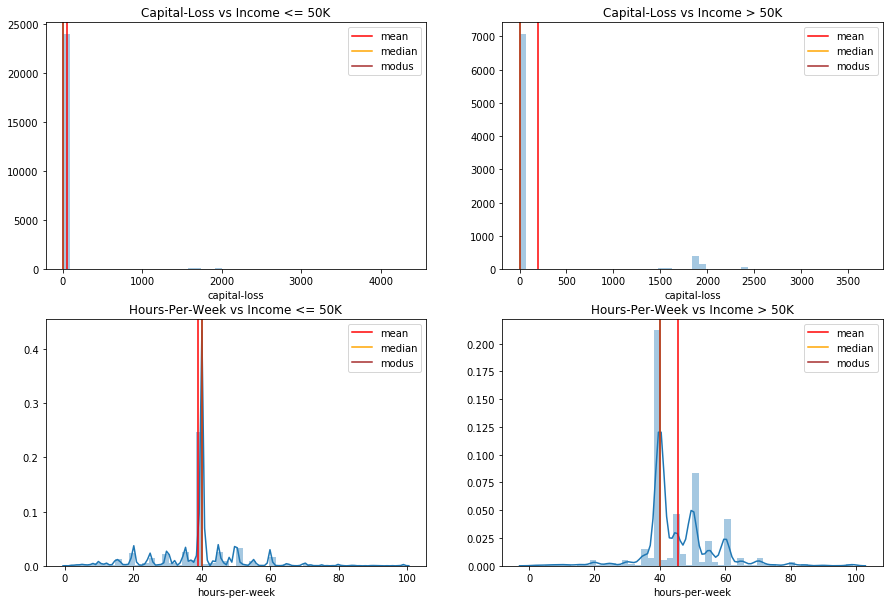

In [39]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('Capital-Loss vs Income <= 50K')
sns.distplot(dfi_less['capital-loss'], kde=False)
plt.axvline(dfi_less['capital-loss'].mean(), color='r', label='mean')
plt.axvline(dfi_less['capital-loss'].median(), color='orange', label='median')
plt.axvline(dfi_less['capital-loss'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(222)
plt.title('Capital-Loss vs Income > 50K')
sns.distplot(dfi_more['capital-loss'], kde=False)
plt.axvline(dfi_more['capital-loss'].mean(), color='r', label='mean')
plt.axvline(dfi_more['capital-loss'].median(), color='orange', label='median')
plt.axvline(dfi_more['capital-loss'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(223)
plt.title('Hours-Per-Week vs Income <= 50K')
sns.distplot(dfi_less['hours-per-week'])
plt.axvline(dfi_less['hours-per-week'].mean(), color='r', label='mean')
plt.axvline(dfi_less['hours-per-week'].median(), color='orange', label='median')
plt.axvline(dfi_less['hours-per-week'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(224)
plt.title('Hours-Per-Week vs Income > 50K')
sns.distplot(dfi_more['hours-per-week'])
plt.axvline(dfi_more['hours-per-week'].mean(), color='r', label='mean')
plt.axvline(dfi_more['hours-per-week'].median(), color='orange', label='median')
plt.axvline(dfi_more['hours-per-week'].mode()[0], color='brown', label='modus')
plt.legend()

plt.show()

# Grafik ini menunjukkan distribusi data, nilai mean, median dan modus.

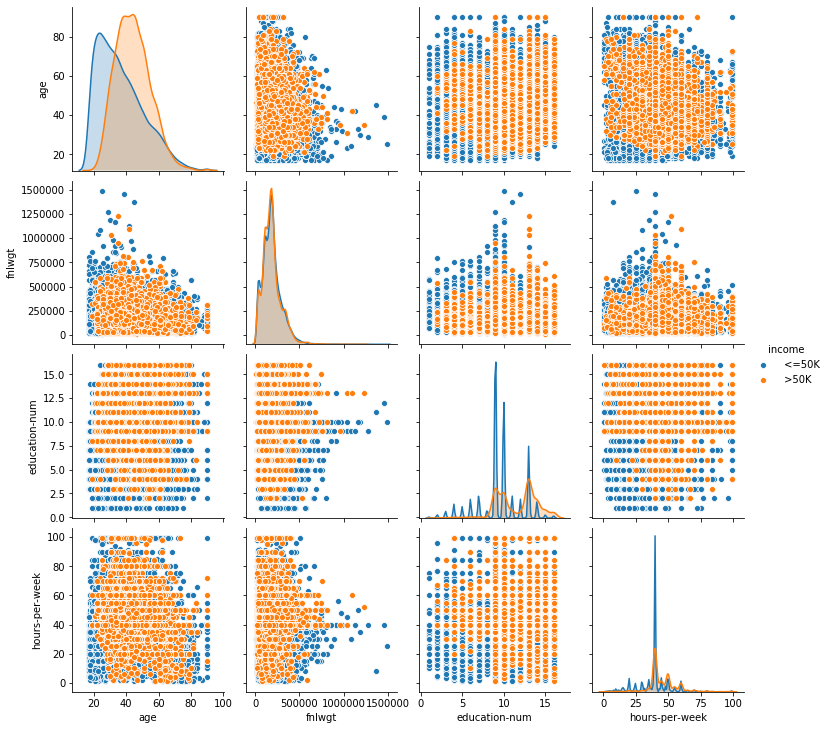

In [40]:
sns.pairplot(df[['age', 'fnlwgt', 'education-num', 'hours-per-week', 'income']], hue='income')

### Question 2

What are additional features that you extract from the data.

### Feature Selection

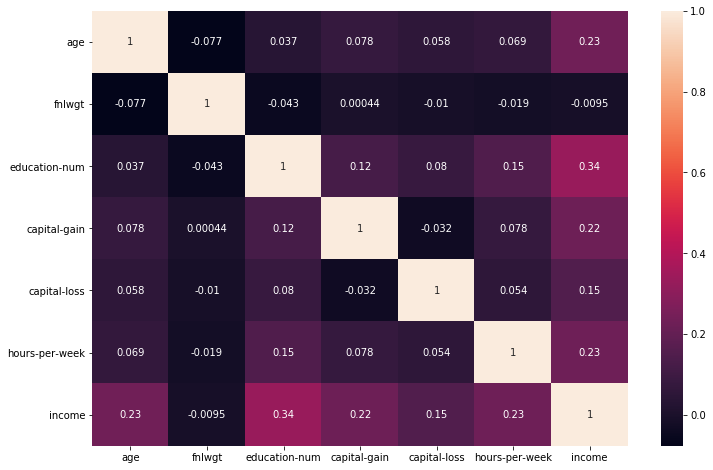

In [41]:
# Correlation
plt.figure(figsize=(12,8))
sns.heatmap(dfa.corr(), annot=True)
plt.show()

In [42]:
dfa.corr()[['income']].sort_values('income', ascending=False).iloc[1:].rename(columns={'income': 'Pearson_Coef'})

,Pearson_Coef
education-num,0.335182
age,0.234039
hours-per-week,0.229690
capital-gain,0.223333
capital-loss,0.150523
fnlwgt,-0.009481


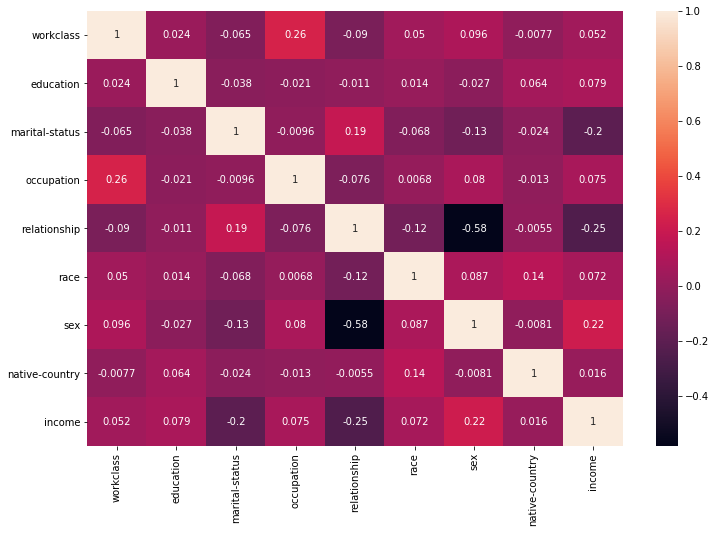

In [43]:
# Correlation
plt.figure(figsize=(12,8))
sns.heatmap(dfc.corr(), annot=True)
plt.show()

In [44]:
dfc.corr()[['income']].sort_values('income', ascending=False).iloc[1:].rename(columns={'income': 'Pearson_Coef'})

,Pearson_Coef
sex,0.215995
education,0.079311
occupation,0.075448
race,0.071853
workclass,0.051645
native-country,0.015845
marital-status,-0.199295
relationship,-0.250924


In [45]:
# Correlation Ratio
def correlation_ratio(categories, measurements):
    
    def convert(data, to):
        converted = None
        if to == 'array':
            if isinstance(data, np.ndarray):
                converted = data
            elif isinstance(data, pd.Series):
                converted = data.values
            elif isinstance(data, list):
                converted = np.array(data)
            elif isinstance(data, pd.DataFrame):
                converted = data.as_matrix()
        elif to == 'list':
            if isinstance(data, list):
                converted = data
            elif isinstance(data, pd.Series):
                converted = data.values.tolist()
            elif isinstance(data, np.ndarray):
                converted = data.tolist()
        elif to == 'dataframe':
            if isinstance(data, pd.DataFrame):
                converted = data
            elif isinstance(data, np.ndarray):
                converted = pd.DataFrame(data)
        else:
            raise ValueError("Unknown data conversion: {}".format(to))
        if converted is None:
            raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
        else:
            return converted
        
    categories = convert(categories, 'array')
    measurements = convert(measurements, 'array')
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [46]:
corr = {}
for col in feat_int:
    corr[col] = correlation_ratio(df['income'], df[col])
corr_df = pd.DataFrame(corr.values(), index=corr.keys(), columns=['correlation_ratio_score'])
corr_df.sort_values('correlation_ratio_score', ascending=False)

,correlation_ratio_score
education-num,0.112347
age,0.054774
hours-per-week,0.052757
capital-gain,0.049877
capital-loss,0.022657
fnlwgt,0.000090


In [47]:
corr = {}
for col in feat_obj:
    corr[col] = correlation_ratio(df[col], dfa['income'])
corr_df = pd.DataFrame(corr.values(), index=corr.keys(), columns=['correlation_ratio_score'])
corr_df.sort_values('correlation_ratio_score', ascending=False)

,correlation_ratio_score
income,1.000000
relationship,0.205733
marital-status,0.200163
education,0.136062
occupation,0.123823
sex,0.046654
workclass,0.032118
race,0.010164
native-country,0.009743


Berdasarkan perhitungan Pearson_Coef dan correlation_ratio_score features yang terendah (tidak terlalu berperan dalam mempengaruhi nilai income) adalah:
- fnlwgt
- native-country

In [48]:
dfm = df.copy(deep=True)
del_feat = ['fnlwgt', 'native-country']
dfm.drop(del_feat, axis=1, inplace=True)
display(dfm)

dfm_1 = dfm.copy(deep=True)
for i in dfc.columns.tolist():
    dfm_1[i] = dfc[i]
dfm_1.drop(['native-country'], axis=1, inplace=True)
# display(dfm_1)

print('features that I extract from the data:',dfm_1.columns.tolist()) # features that I extract from the data.

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


features that I extract from the data: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


## Classification

### Question 3

Please prepare the features that will be used to build the model and show the result. 

In [49]:
dfm_1

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,50,6,9,13,2,4,0,4,1,0,0,13,0
1,38,4,11,9,0,6,1,4,1,0,0,40,0
2,53,4,1,7,2,6,0,2,1,0,0,40,0
3,28,4,9,13,2,10,5,2,0,0,0,40,0
4,37,4,12,14,2,4,5,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38,0
32556,40,4,11,9,2,7,0,4,1,0,0,40,1
32557,58,4,11,9,6,1,4,4,0,0,0,40,0
32558,22,4,11,9,4,1,3,4,1,0,0,20,0


In [50]:
X = dfm_1.drop('income', axis=1)
y = dfm_1['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [139]:
display(X)
display(y)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,50,6,9,13,2,4,0,4,1,0,0,13
1,38,4,11,9,0,6,1,4,1,0,0,40
2,53,4,1,7,2,6,0,2,1,0,0,40
3,28,4,9,13,2,10,5,2,0,0,0,40
4,37,4,12,14,2,4,5,4,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38
32556,40,4,11,9,2,7,0,4,1,0,0,40
32557,58,4,11,9,6,1,4,4,0,0,0,40
32558,22,4,11,9,4,1,3,4,1,0,0,20


0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income, Length: 32560, dtype: int32

In [51]:
len(X_train) == len(y_train)

True

In [52]:
display(y_train.value_counts())
display(y_test.value_counts())

0    19729
1     6319
Name: income, dtype: int64

0    4990
1    1522
Name: income, dtype: int64

In [53]:
display(X_train)
display(y_train)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
27604,56,5,11,9,2,12,0,4,1,0,1902,40
3136,51,4,0,6,2,12,0,4,1,0,1977,40
4521,27,4,15,10,4,1,1,4,0,0,0,40
31814,55,4,10,16,2,10,0,4,1,0,0,40
28842,22,4,11,9,4,8,3,4,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32511,20,4,11,9,4,7,3,4,1,0,0,40
5192,61,0,11,9,6,0,1,4,0,0,0,36
12172,55,2,11,9,2,10,2,4,0,0,2246,40
235,40,7,15,10,4,1,1,4,0,0,0,38


27604    1
3136     1
4521     0
31814    1
28842    0
        ..
32511    0
5192     0
12172    1
235      0
29733    0
Name: income, Length: 26048, dtype: int32

In [54]:
display(X_test)
display(y_test)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
32181,50,4,11,9,2,6,0,4,1,0,0,45
32493,82,0,11,9,4,0,1,4,1,0,0,3
21941,38,1,11,9,0,10,4,4,0,0,0,40
20617,43,2,12,14,5,10,4,2,0,0,0,37
187,31,4,12,14,2,10,5,4,0,0,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
22209,54,7,9,13,2,4,0,4,1,0,0,40
1600,57,7,11,9,0,4,1,4,0,0,0,50
639,26,4,11,9,0,3,1,4,1,0,0,55
15711,25,4,9,13,4,1,1,4,1,0,0,40


32181    0
32493    0
21941    0
20617    0
187      0
        ..
22209    1
1600     0
639      0
15711    1
5625     0
Name: income, Length: 6512, dtype: int32

### Resample

In [55]:
# Oversampling
ros = RandomOverSampler(random_state=1)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

display(y_train.value_counts())
display(y_ros.value_counts())
display(y_test.value_counts())

0    19729
1     6319
Name: income, dtype: int64

1    19729
0    19729
Name: income, dtype: int64

0    4990
1    1522
Name: income, dtype: int64

In [56]:
# SMOTE
smo = SMOTE(random_state=1)
X_smo, y_smo = smo.fit_resample(X_train, y_train)

display(y_train.value_counts())
display(y_smo.value_counts())
display(y_test.value_counts())

0    19729
1     6319
Name: income, dtype: int64

1    19729
0    19729
Name: income, dtype: int64

0    4990
1    1522
Name: income, dtype: int64

In [57]:
# Undersampling
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

display(y_train.value_counts())
display(y_rus.value_counts())
display(y_test.value_counts())

0    19729
1     6319
Name: income, dtype: int64

1    6319
0    6319
Name: income, dtype: int64

0    4990
1    1522
Name: income, dtype: int64

### Question 4

Please build a model to predict `income` on the **training set**. Explain why you choose that model. Report the model performance. Is your model good enough? Explain.

### 1. Logistic Regression

C:\Users\Asyraf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


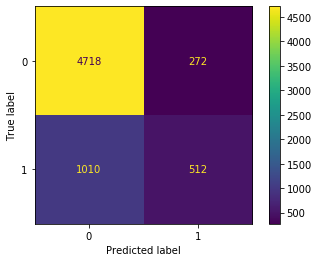

In [58]:
log = LogisticRegression(random_state=1)
log.fit(X_train, y_train)

log_pred = log.predict(X_test)
log_proba = log.predict_proba(X_test)

confusion_matrix(y_test, log_pred)

plot_confusion_matrix(log, X_test, y_test)

In [59]:
print(classification_report(y_test, log_pred, target_names=['0/-/income <= 50K', '1/+/income > 50K']))

                   precision    recall  f1-score   support

0/-/income <= 50K       0.82      0.95      0.88      4990
 1/+/income > 50K       0.65      0.34      0.44      1522

         accuracy                           0.80      6512
        macro avg       0.74      0.64      0.66      6512
     weighted avg       0.78      0.80      0.78      6512



### 2. Decision Tree Classifier

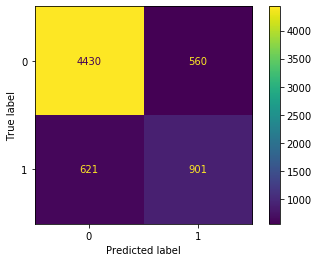

In [60]:
dtr = DecisionTreeClassifier(random_state=1)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_proba = dtr.predict_proba(X_test)

confusion_matrix(y_test, dtr_pred)

plot_confusion_matrix(dtr, X_test, y_test)

In [61]:
print(classification_report(y_test, dtr_pred, target_names=['0/-/income <= 50K', '1/+/income > 50K']))

                   precision    recall  f1-score   support

0/-/income <= 50K       0.88      0.89      0.88      4990
 1/+/income > 50K       0.62      0.59      0.60      1522

         accuracy                           0.82      6512
        macro avg       0.75      0.74      0.74      6512
     weighted avg       0.82      0.82      0.82      6512



### 3. Random Forest Classifier

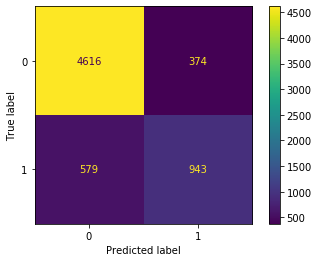

In [62]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)

confusion_matrix(y_test, rfc_pred)

plot_confusion_matrix(rfc, X_test, y_test)

In [63]:
print(classification_report(y_test, rfc_pred, target_names=['0/-/income <= 50K', '1/+/income > 50K']))

                   precision    recall  f1-score   support

0/-/income <= 50K       0.89      0.93      0.91      4990
 1/+/income > 50K       0.72      0.62      0.66      1522

         accuracy                           0.85      6512
        macro avg       0.80      0.77      0.79      6512
     weighted avg       0.85      0.85      0.85      6512



### 4. AdaBoost Classifier

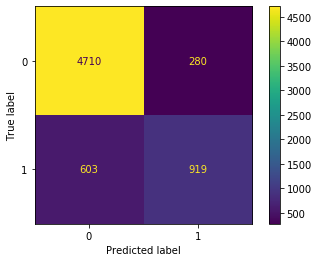

In [64]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_proba = ada.predict_proba(X_test)

confusion_matrix(y_test, ada_pred)

plot_confusion_matrix(ada, X_test, y_test)

In [65]:
print(classification_report(y_test, ada_pred, target_names=['0/-/income <= 50K', '1/+/income > 50K']))

                   precision    recall  f1-score   support

0/-/income <= 50K       0.89      0.94      0.91      4990
 1/+/income > 50K       0.77      0.60      0.68      1522

         accuracy                           0.86      6512
        macro avg       0.83      0.77      0.79      6512
     weighted avg       0.86      0.86      0.86      6512



### 5. Gradient Boosting Classifier

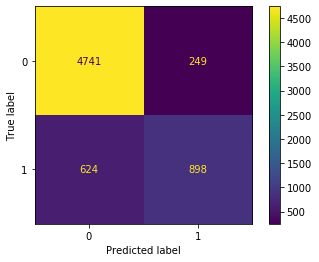

In [66]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_proba = gbc.predict_proba(X_test)

confusion_matrix(y_test, gbc_pred)

plot_confusion_matrix(gbc, X_test, y_test)

In [67]:
print(classification_report(y_test, gbc_pred, target_names=['0/-/income <= 50K', '1/+/income > 50K']))

                   precision    recall  f1-score   support

0/-/income <= 50K       0.88      0.95      0.92      4990
 1/+/income > 50K       0.78      0.59      0.67      1522

         accuracy                           0.87      6512
        macro avg       0.83      0.77      0.79      6512
     weighted avg       0.86      0.87      0.86      6512



### 6. K Nearest Neighbour Classifier

In [68]:
for i in range(1,16,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    knn_model_pred = knn_model.predict(X_test)

    print(f'for k={i}:', accuracy_score(y_test, knn_model_pred))
    
# Pilih nilai k yang accuracy_score nya paling tinggi

for k=1: 0.8238636363636364
for k=3: 0.8393734643734644
for k=5: 0.8433660933660934
for k=7: 0.8424447174447175
for k=9: 0.8490479115479116
for k=11: 0.8501228501228502
for k=13: 0.8481265356265356
for k=15: 0.8481265356265356


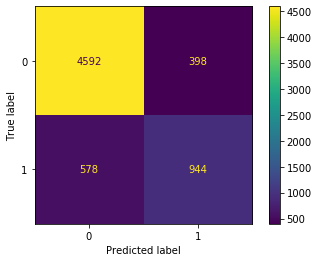

In [69]:
knn = KNeighborsClassifier(n_neighbors=11) # default p=2 (minkowski)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

confusion_matrix(y_test, knn_pred)

plot_confusion_matrix(knn, X_test, y_test)

In [70]:
print(classification_report(y_test, knn_pred, target_names=['0/-/income <= 50K', '1/+/income > 50K']))

                   precision    recall  f1-score   support

0/-/income <= 50K       0.89      0.92      0.90      4990
 1/+/income > 50K       0.70      0.62      0.66      1522

         accuracy                           0.85      6512
        macro avg       0.80      0.77      0.78      6512
     weighted avg       0.85      0.85      0.85      6512



### Pemilihan Metode Machine Learning terbaik untuk diproses lanjut:

In [71]:
ml_model = pd.DataFrame({
    "Logistic Regression": [accuracy_score(y_test, log_pred), precision_score(y_test, log_pred), recall_score(y_test, log_pred, pos_label=0), list(confusion_matrix(y_test, log_pred).ravel())],
    "Decision Tree Classifier": [accuracy_score(y_test, dtr_pred), precision_score(y_test, dtr_pred), recall_score(y_test, dtr_pred, pos_label=0), list(confusion_matrix(y_test, dtr_pred).ravel())],
    "Random Forest Classifier": [accuracy_score(y_test, rfc_pred), precision_score(y_test, rfc_pred), recall_score(y_test, rfc_pred, pos_label=0), list(confusion_matrix(y_test, rfc_pred).ravel())],
    "AdaBoost Classifier": [accuracy_score(y_test, ada_pred), precision_score(y_test, ada_pred), recall_score(y_test, ada_pred, pos_label=0), list(confusion_matrix(y_test, ada_pred).ravel())],
    "Gradient Boosting Classifier": [accuracy_score(y_test, gbc_pred), precision_score(y_test, gbc_pred), recall_score(y_test, gbc_pred, pos_label=0), list(confusion_matrix(y_test, gbc_pred).ravel())],
    "KNeighbors Classifier": [accuracy_score(y_test, knn_pred), precision_score(y_test, knn_pred), recall_score(y_test, knn_pred, pos_label=0), list(confusion_matrix(y_test, knn_pred).ravel())]
}, index = ['accuracy_score', 'precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)']).T
ml_model

,accuracy_score,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
Logistic Regression,0.803133,0.653061,0.945491,"[4718, 272, 1010, 512]"
Decision Tree Classifier,0.818643,0.616701,0.887776,"[4430, 560, 621, 901]"
Random Forest Classifier,0.853655,0.716021,0.92505,"[4616, 374, 579, 943]"
AdaBoost Classifier,0.864404,0.766472,0.943888,"[4710, 280, 603, 919]"
Gradient Boosting Classifier,0.86594,0.782912,0.9501,"[4741, 249, 624, 898]"
KNeighbors Classifier,0.850123,0.703428,0.92024,"[4592, 398, 578, 944]"


In [72]:
ml_model['accuracy_score'].sort_values(ascending=False)  # (TN+TP) / (TN+FP+FN+TP)

Gradient Boosting Classifier     0.86594
AdaBoost Classifier             0.864404
Random Forest Classifier        0.853655
KNeighbors Classifier           0.850123
Decision Tree Classifier        0.818643
Logistic Regression             0.803133
Name: accuracy_score, dtype: object

In [73]:
ml_model['precision_score(+)'].sort_values(ascending=False)  # TN / (FP+TN)

Gradient Boosting Classifier    0.782912
AdaBoost Classifier             0.766472
Random Forest Classifier        0.716021
KNeighbors Classifier           0.703428
Logistic Regression             0.653061
Decision Tree Classifier        0.616701
Name: precision_score(+), dtype: object

In [74]:
ml_model['recall_score(-)'].sort_values(ascending=False)  # TP / (FP+TP)

Gradient Boosting Classifier      0.9501
Logistic Regression             0.945491
AdaBoost Classifier             0.943888
Random Forest Classifier         0.92505
KNeighbors Classifier            0.92024
Decision Tree Classifier        0.887776
Name: recall_score(-), dtype: object

Model **Gradient Boosting Classifier** terpilih sebagai Model Machine Learning terbaik karena memiliki accuracy, precision, dan recall score tertinggi. Maka model ini akan lanjut diproses untuk mendapatkan hasil lebih baik lagi.

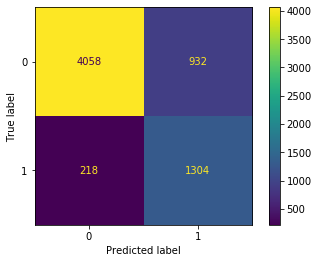

In [75]:
# Dengan Oversampling
gbc_ros = GradientBoostingClassifier(random_state=1)
gbc_ros.fit(X_ros, y_ros)

gbc_ros_pred = gbc_ros.predict(X_test)
gbc_ros_proba = gbc_ros.predict_proba(X_test)

confusion_matrix(y_test, gbc_ros_pred)

plot_confusion_matrix(gbc_ros, X_test, y_test)

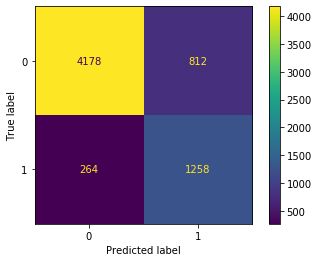

In [76]:
# Dengan SMOTE
gbc_smo = GradientBoostingClassifier(random_state=1)
gbc_smo.fit(X_smo, y_smo)

gbc_smo_pred = gbc_smo.predict(X_test)
gbc_smo_proba = gbc_smo.predict_proba(X_test)

confusion_matrix(y_test, gbc_smo_pred)

plot_confusion_matrix(gbc_smo, X_test, y_test)

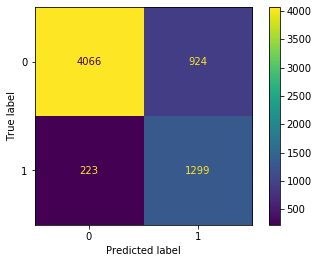

In [77]:
# Dengan Undersampling
gbc_rus = GradientBoostingClassifier(random_state=1)
gbc_rus.fit(X_rus, y_rus)

gbc_rus_pred = gbc_rus.predict(X_test)
gbc_rus_proba = gbc_rus.predict_proba(X_test)

confusion_matrix(y_test, gbc_rus_pred)

plot_confusion_matrix(gbc_rus, X_test, y_test)

In [78]:
gbc_model = pd.DataFrame({
    "GradientBoosting Classifier No Resample": [accuracy_score(y_test, gbc_pred), precision_score(y_test, gbc_pred), recall_score(y_test, gbc_pred, pos_label=0), list(confusion_matrix(y_test, gbc_pred).ravel())],
    "GradientBoosting Classifier With Oversampling": [accuracy_score(y_test, gbc_ros_pred), precision_score(y_test, gbc_ros_pred), recall_score(y_test, gbc_ros_pred, pos_label=0), list(confusion_matrix(y_test, gbc_ros_pred).ravel())],
    "GradientBoosting Classifier With SMOTE": [accuracy_score(y_test, gbc_smo_pred), precision_score(y_test, gbc_smo_pred), recall_score(y_test, gbc_smo_pred, pos_label=0), list(confusion_matrix(y_test, gbc_smo_pred).ravel())],
    "GradientBoosting Classifier With Undersampling": [accuracy_score(y_test, gbc_rus_pred), precision_score(y_test, gbc_rus_pred), recall_score(y_test, gbc_rus_pred, pos_label=0), list(confusion_matrix(y_test, gbc_rus_pred).ravel())]
}, index = ['accuracy_score', 'precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)']).T
gbc_model

,accuracy_score,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
GradientBoosting Classifier No Resample,0.86594,0.782912,0.9501,"[4741, 249, 624, 898]"
GradientBoosting Classifier With Oversampling,0.823403,0.583184,0.813226,"[4058, 932, 218, 1304]"
GradientBoosting Classifier With SMOTE,0.834767,0.607729,0.837275,"[4178, 812, 264, 1258]"
GradientBoosting Classifier With Undersampling,0.823864,0.584345,0.81483,"[4066, 924, 223, 1299]"


Dengan **Gradient Boosting Classifier** dan **tanpa metode Resample** dihasilkan nilai scores tertinggi.

### Looking for the best parameters

In [79]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [80]:
criterion_opsi = ['friedman_mse', 'mse', 'mae']
loss_opsi = ['deviance', 'exponential']
min_samples_split_opsi = [1,2,4]
max_features_opsi = [None, 'auto', 'sqrt', 'log2']

params = {'criterion': criterion_opsi, 'loss': loss_opsi, 'min_samples_split': min_samples_split_opsi,
          'max_features': max_features_opsi}
params

{'criterion': ['friedman_mse', 'mse', 'mae'],
 'loss': ['deviance', 'exponential'],
 'min_samples_split': [1, 2, 4],
 'max_features': [None, 'auto', 'sqrt', 'log2']}

In [81]:
# RandomSearchCV
# gbc = GradientBoostingClassifier(random_state=1)
# random_for_gbc = RandomizedSearchCV(estimator=gbc, param_distributions = params, cv = 7, random_state=1, scoring='precision') # scoring='precision' karena mau tekan FP
# random_for_gbc.fit(X_train, y_train)

In [82]:
# random_for_gbc.best_estimator_

In [83]:
# gbc_random = random_for_gbc.best_estimator_
# gbc_random.get_params()

In [84]:
# gbc_random.fit(X_train, y_train)
# gbc_random_pred = gbc_random.predict(X_test)
# gbc_random_proba = gbc_random.predict_proba(X_test)

# confusion_matrix(y_test, gbc_random_pred)

# plot_confusion_matrix(gbc_random, X_test, y_test)

In [85]:
# gbc.fit(X_train, y_train)
# gbc_pred = gbc.predict(X_test)
# gbc_proba = gbc.predict_proba(X_test)

# confusion_matrix(y_test, gbc_pred)

# plot_confusion_matrix(gbc, X_test, y_test)

Dengan Hyperparameter tuning with RandomizedSearchCV tidak memberi evaluation metric yang lebih baik. Maka kita tetap memakai model **"gbc"**.

### KFold Validation

In [86]:
kf = KFold(n_splits=8, random_state=1, shuffle=True)
kf

KFold(n_splits=8, random_state=1, shuffle=True)

In [87]:
kf.get_n_splits(X)

8

In [88]:
display(X.head())
print(len(X))

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,50,6,9,13,2,4,0,4,1,0,0,13
1,38,4,11,9,0,6,1,4,1,0,0,40
2,53,4,1,7,2,6,0,2,1,0,0,40
3,28,4,9,13,2,10,5,2,0,0,0,40
4,37,4,12,14,2,4,5,4,0,0,0,40


32560


In [89]:
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    print(fold)
    print('TRAIN:', train_index, '\nTEST:', test_index)

1
TRAIN: [    0     1     3 ... 32557 32558 32559] 
TEST: [    2    23    33 ... 32534 32542 32543]
2
TRAIN: [    0     1     2 ... 32556 32557 32558] 
TEST: [    8    11    19 ... 32547 32551 32559]
3
TRAIN: [    1     2     5 ... 32557 32558 32559] 
TEST: [    0     3     4 ... 32525 32536 32546]
4
TRAIN: [    0     1     2 ... 32557 32558 32559] 
TEST: [    5    12    28 ... 32544 32550 32552]
5
TRAIN: [    0     1     2 ... 32557 32558 32559] 
TEST: [   55    58    60 ... 32553 32554 32556]
6
TRAIN: [    0     2     3 ... 32556 32557 32559] 
TEST: [    1    10    21 ... 32539 32541 32558]
7
TRAIN: [    0     1     2 ... 32557 32558 32559] 
TEST: [    9    47    64 ... 32540 32545 32555]
8
TRAIN: [    0     1     2 ... 32556 32558 32559] 
TEST: [   14    15    18 ... 32537 32548 32557]


In [90]:
def KScore(model, xtr, xts, ytr, yts):
    model.fit(xtr, ytr)
    pred = model.predict(xts)
    return (precision_score(yts, pred), recall_score(yts, pred, pos_label=0), list(confusion_matrix(yts, pred).ravel()))

In [91]:
score = []
for train_index, test_index in kf.split(X):
    Xk_train = X.iloc[train_index,:]
    Xk_test = X.iloc[test_index,:]
    yk_train = y.iloc[train_index]
    yk_test = y.iloc[test_index]
    score.append(KScore(gbc, X_train, X_test, y_train, y_test)) # disini pakai model (engine) "gbc" (Gradient Boosting Classifier).

score

[(0.7829119442022667, 0.9501002004008016, [4741, 249, 624, 898]),
 (0.7829119442022667, 0.9501002004008016, [4741, 249, 624, 898]),
 (0.7829119442022667, 0.9501002004008016, [4741, 249, 624, 898]),
 (0.7829119442022667, 0.9501002004008016, [4741, 249, 624, 898]),
 (0.7829119442022667, 0.9501002004008016, [4741, 249, 624, 898]),
 (0.7829119442022667, 0.9501002004008016, [4741, 249, 624, 898]),
 (0.7829119442022667, 0.9501002004008016, [4741, 249, 624, 898]),
 (0.7829119442022667, 0.9501002004008016, [4741, 249, 624, 898])]

In [92]:
kfold_df = pd.DataFrame(score, columns=['precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)'],
                       index = range(1,9))
kfold_df

,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
1,0.782912,0.9501,"[4741, 249, 624, 898]"
2,0.782912,0.9501,"[4741, 249, 624, 898]"
3,0.782912,0.9501,"[4741, 249, 624, 898]"
4,0.782912,0.9501,"[4741, 249, 624, 898]"
5,0.782912,0.9501,"[4741, 249, 624, 898]"
6,0.782912,0.9501,"[4741, 249, 624, 898]"
7,0.782912,0.9501,"[4741, 249, 624, 898]"
8,0.782912,0.9501,"[4741, 249, 624, 898]"


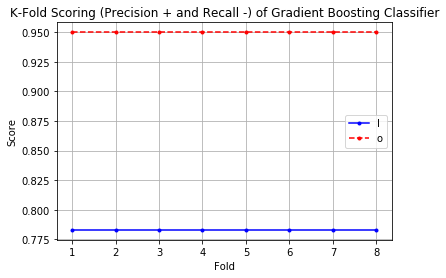

In [114]:
plt.title('K-Fold Scoring (Precision + and Recall -) of Gradient Boosting Classifier')
plt.plot(kfold_df.index, kfold_df['precision_score(+)'], 'b.-', label='Precision(+)')
plt.plot(kfold_df.index, kfold_df['recall_score(-)'], 'r.--', label='Recall(-)')
plt.xlabel('Fold') # Fold itu artinya percobaan yg keberapa kali
plt.ylabel('Score') # Score itu artinya score dari percobaan itu
plt.legend('lower right')
plt.grid()
plt.show() # Setelah beberapa kali dites, scoring nya tetap stabil (baik).

### ROC AUC

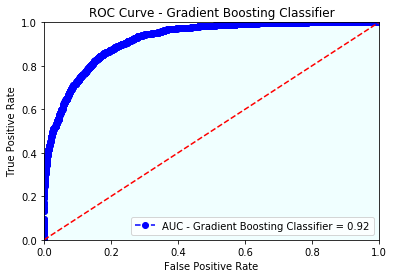

In [94]:
gbcprob1 = gbc_proba[:,1]
fpr_gbc1, tpr_gbc1, threshold_gbc1 = roc_curve(y_test, gbcprob1)
auc_gbc = auc(fpr_gbc1, tpr_gbc1)

plt.title('ROC Curve - Gradient Boosting Classifier')
plt.plot(fpr_gbc1, tpr_gbc1, 'b--o', label='AUC - Gradient Boosting Classifier = {}'.format(round(auc_gbc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1]) # limit sumbu x
plt.ylim([0,1]) # limit sumbu y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc1, tpr_gbc1, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [111]:
thres_gbc = pd.DataFrame({'thres': threshold_gbc1, 'tpr': tpr_gbc1, 'fpr': fpr_gbc1})
# display(thres_gbc['tpr'].sort_values(ascending=False))
# display(thres_gbc['fpr'].sort_values(ascending=True))
thres_gbc[(thres_gbc['tpr']>0.725) & (thres_gbc['fpr']<0.1)]
# thres_gbc

,thres,tpr,fpr
570,0.365476,0.725361,0.096994
571,0.365181,0.725361,0.097395
572,0.365040,0.726018,0.097395
573,0.364942,0.726018,0.097996
574,0.364680,0.726675,0.097996
575,0.364063,0.727989,0.098397
576,0.363899,0.728647,0.098397
577,0.363844,0.728647,0.098798
578,0.363744,0.728647,0.099198
579,0.363645,0.729961,0.099198


In [112]:
gbc_pred_roc = [0 if x < 0.364 else 1 for x in gbcprob1] 
confusion_matrix(y_test, gbc_pred_roc)
# model gbc_pred_roc untuk tujuan FP dan FN yang lebih seimbang

array([[4499,  491],
       [ 414, 1108]], dtype=int64)

In [97]:
confusion_matrix(y_test, gbc_pred) # model gbc menggunakan default threshold = 0.5

array([[4741,  249],
       [ 624,  898]], dtype=int64)

In [98]:
# gbc_proba[:,1]
gbc.predict_proba(X_test)[:,1]

array([0.308849  , 0.0184838 , 0.06056029, ..., 0.05059247, 0.02662862,
       0.03015195])

(0, 1)

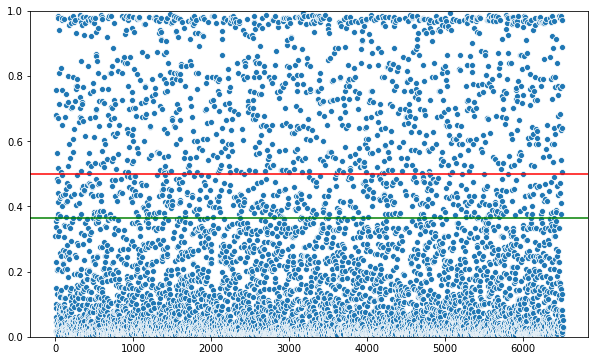

In [143]:
gbcprob1 = gbc.predict_proba(X_test)[:,1]
df_gbc_prob = pd.DataFrame(gbcprob1, columns=['gbc_prob1'])
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_gbc_prob['gbc_prob1'])
plt.axhline(0.5, color='red')
plt.axhline(0.364, color='green')
plt.ylim(0,1)

In [119]:
display(X_test.loc[[22209]])
display(y_test.loc[[22209]])

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
22209,54,7,9,13,2,4,0,4,1,0,0,40


22209    1
Name: income, dtype: int32

In [118]:
# Contoh Prediksi:
pred_proba = gbc.predict_proba(X_test.loc[[22209]])
gbc_pred_thres_custom = 0 if pred_proba[0][1] < 0.5 else 1
pred = 'income > 50K' if gbc_pred_thres_custom == 1 else 'income <= 50K'
proba = pred_proba[0][0] if pred == 'income <= 50K' else pred_proba[0][1]
endresult = f"{round(proba*100,2)}% {pred}"
endresult

'64.12% income > 50K'

In [115]:
pred_proba

array([[0.35876959, 0.64123041]])

- I choose the Gradient Boosting Classifier (gbc) model, because the gbc has better evaluation metric scores than the others machine learning models.
- I think the model gbc is good enough, because the gbc has been validated with K-Fold Validation Method, that it has stable precision and recall score. Other than that it has great AUC value (0.92).

### Question 5

What do you think is the befitting evaluation metric for this task? Why?

*My answer:*

Metrik evaluasi yang sesuai atau yang perlu lebih diperhatikan untuk tugas ini adalah precision_score(+) dan recall_score(-). Artinya angka FP dari metrik evaluasi perlu ditekan, karena:

Contoh Regulasi Negara mengatakan:
- Jika orang incomenya tinggi (> 50K), maka tidak perlu mendapatkan bantuan ekonomi.
- Tapi jika orang incomenya rendah (<= 50K), maka perlu mendapatkan bantuan ekonomi.

Tekan FP karena:
- Kalau orang terprediksi incomenya tinggi, maka ia tidak mendapatkan bantuan ekonomi. Kalau kenyataannya orang itu incomenya rendah, maka kasian parah orang yang membutuhkan bantuan tapi tidak mendapatkan bantuan.

- Tapi kalau orang terprediksi incomenya rendah, maka ia akan mendapatkan bantuan ekonomi. Kalau kenyataannya orang itu incomenya tinggi, maka bukan suatu hal yang parah terhadap kehidupan karena orang itu tetap tidak kekurangan/kelaparan. Namun juga tetap perlu diperhatikan batasan angka FN, agar negara juga tidak rugi dalam kesalahan mengalokasikan anggaran.

### Question 6

If you have to reduce the features, how do you do that, will the model be good enough with reduced featured to predict `income`.

In [132]:
dfm_all = df.copy(deep=True)
for i in dfc.columns.tolist():
    dfm_all[i] = dfc[i]
dfm_all
# len(dfm_all.columns)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [133]:
X_all = dfm_all.drop('income', axis=1)
y_all = dfm_all['income']
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=1)

In [142]:
display(X_all)
display(y_all)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income, Length: 32560, dtype: int32

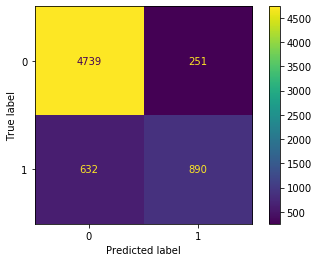

In [135]:
gbc_all = GradientBoostingClassifier(random_state=1)
gbc_all.fit(X_train_all, y_train_all)
gbc_all_pred = gbc_all.predict(X_test_all)
gbc_all_proba = gbc_all.predict_proba(X_test_all)

confusion_matrix(y_test_all, gbc_all_pred)

plot_confusion_matrix(gbc_all, X_test_all, y_test_all)

In [136]:
print(classification_report(y_test_all, gbc_all_pred, target_names=['0/-/income <= 50K', '1/+/income > 50K']))

                   precision    recall  f1-score   support

0/-/income <= 50K       0.88      0.95      0.91      4990
 1/+/income > 50K       0.78      0.58      0.67      1522

         accuracy                           0.86      6512
        macro avg       0.83      0.77      0.79      6512
     weighted avg       0.86      0.86      0.86      6512



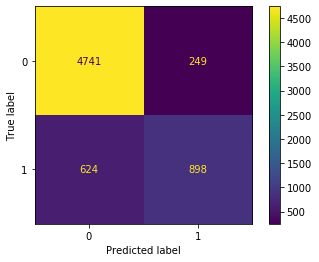

In [137]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_proba = gbc.predict_proba(X_test)

confusion_matrix(y_test, gbc_pred)

plot_confusion_matrix(gbc, X_test, y_test)

In [138]:
gbc_model_comparison = pd.DataFrame({
    "GradientBoosting Classifier With Features Selection": [accuracy_score(y_test, gbc_pred), precision_score(y_test, gbc_pred), recall_score(y_test, gbc_pred, pos_label=0), list(confusion_matrix(y_test, gbc_pred).ravel())],
    "GradientBoosting Classifier With All Features": [accuracy_score(y_test, gbc_all_pred), precision_score(y_test, gbc_all_pred), recall_score(y_test, gbc_all_pred, pos_label=0), list(confusion_matrix(y_test, gbc_all_pred).ravel())]
}, index = ['accuracy_score', 'precision_score(+)', 'recall_score(-)', 'conf_matrix (TN, FP, FN, TP)']).T
gbc_model_comparison

,accuracy_score,precision_score(+),recall_score(-),"conf_matrix (TN, FP, FN, TP)"
GradientBoosting Classifier With Features Selection,0.86594,0.782912,0.9501,"[4741, 249, 624, 898]"
GradientBoosting Classifier With All Features,0.864404,0.780018,0.949699,"[4739, 251, 632, 890]"


- I have to reduce the features with Features Selection Methods. I used Features Selection with Methods Pearson Coefficient (Correlation) and Correlation Ratio. The Features that has low evaluation metrics scores (value) will be droped.

- Will the model be good enough with reduced featured to predict `income`? Yes. With the dataframe `gbc_model_comparison` we can see that the gbc model with reduced featured has better evaluation metrics scores.